# Calculando FFT de um sinal 
<span style="color:red"><b>F540 - 1s2019</b></span>

## Pacotes

In [29]:
import numpy as np # calculo numerico
import matplotlib.pyplot as plt # graficos
#import pandas as pd #leitura e escrita de dados

## Importando arquivos
Esta parte será alterada em aula para que vocês trabalhem a FFT do sinal medido no osciloscópio

In [30]:
### Parametros de entrada ###
#nome_arq= 'dados.csv'
#pd.read_csv(nome_arq)

## Calculando FFT (Fast Fourier Transform)

### Gerando sinal temporal
Tente explorar os efeitos da amostragem do sinal  (intervalo temporal entre dois pontos consecutivos = ```timestep```) e duração do sinal (```Tf```) nas características da FFT. 

<span style="color:red">Em particular, explore o seguinte: </span>

* Como a resolução de frequência da FFT (intervalo entre dois pontos do vetor de frequências ```freq```) é influenciado por ```timestep``` e ```Tf```?
* Como a largura de banda da FFT (frequência máxima do vetor de frequências ```freq```  é influenciado por ```timestep``` e ```Tf```?
* Tente entender o que ocorre se a frequencia do sinal ```f0``` for maior que a frequencia de amostragem ```fs```
    

Text(0,0.5,'Amplitude (V)')

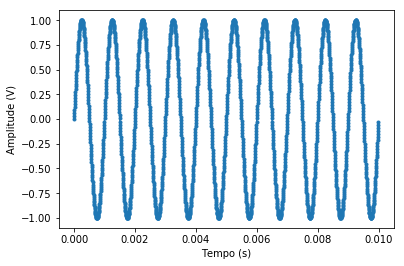

In [51]:
#vetor de tempo
Tf = 10e-3  # tempo máximo em segundos
dt = Tf/2**11 # intervalo de amostragem
time = np.arange(0,Tf,dt) # vetor de tempo
#sinal temporal
f0 = 1e3 # frequencia
T0 = 1/f0 # periodo do sinal
amp = np.sin(2*np.pi*f0*time) 
#outros sinais que você deve tentar
#amp = np.sin(2*np.pi*f0*time) + np.sin(2*np.pi*(1.5*f0)*time)
#amp = np.sin(2*np.pi*f0*time) + np.sin(2*np.pi*(1.5*f0)*time) + np.sin(2*np.pi*(2*f0)*time) 

plt.plot(time,amp,'.-')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')

### Calculando FFT
* Leia o material disponível na pasta do Experimento 1 do GitHub.
* Leia a ajuda sobre os comandos dos numpy np.fft.fft e np.fft.fftfreq

In [73]:
#### fft ####
timestep = time[1]-time[0] # intervalo de amostragem = dt
n = len(amp)
fs = 1/timestep # frequencia de amostragem

#vetor de frequencias (positivas e negativas)
freq = np.fft.fftfreq(n, d=timestep)
#fft
yfft = np.fft.fft(amp)/n # fft computing and normalization

yabs = abs(yfft)

### Gráficos

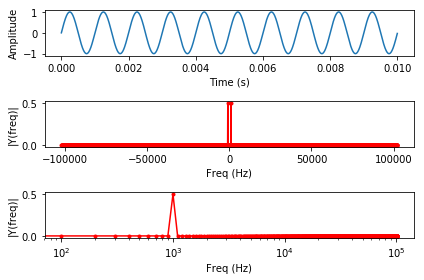

In [74]:
### gráfico ###
fig, ax = plt.subplots(3, 1)
#tempo
ax[0].plot(time,amp)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
#fft linear - frequencias negativas e positivas
ax[1].plot(freq, yabs,'r.-') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
#fft semilog - frequencias positivas
freq_pos = freq[0:int(n/2)]
yabs_pos = yabs[0:int(n/2)]
ax[2].semilogx(freq_pos, yabs_pos,'r.-') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')
#ajustar e mostrar
plt.tight_layout()
plt.show()